<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this homework notebook, please modify only the cells that start with:</font>

```python
# modify this cell
```

# 1. Die Rolls

Dice throws are another easy experiment to conduct. But first let us look at how we can reproduce the sampled data. To do this we can set the `seed` value of the random number generator to a chosen value.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
np.random.seed(666)
print(np.random.randint(9))

2


If we run the experiment again, we might get a different set of numbers.

In [2]:
print(np.random.randint(9))

6


In [3]:
np.random.seed(666)
print(np.random.randint(9))
print(np.random.randint(9))

2
6


## Exercise
Now consider a fair die. Each face has probability $\frac16$. We simulate $n$ die rolls and plot the empirical probability of each face, alongside the theoretical probability. 

In [4]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,1000),continuos_update=False)
def probability_plot(n):
    """ 
        input: n (generate n random die rolls)
        output: Count (counting the occurance of each event )
    """
    #
    # YOUR CODE HERE
    #
    # Generate n random die rolls
    faces = 6 # 每个骰子具有六个面
    rolls = np.random.randint(1, faces+1, size=n) # 返回n个1至6的随机整数组成的一维数组来储存n次骰子的结果

    # Count the occurrence of each event
    b = 0
    Count = np.zeros((6,n+1)) # 设置一个初值全为零的6行，n+1列的二维数组以便储存统计结果
    
    for y in range(n):  # 遍历rolls数组
        if rolls[b]==1:
            Count[0][b+1:n+1]+=1  # 若第一次投掷结果为1，则从第b+1个元素开始往后的每一个元素都加1次
        elif rolls[b]==2:
            Count[1][b+1:n+1]+=1
        elif rolls[b]==3:
            Count[2][b+1:n+1]+=1
        elif rolls[b]==4:
            Count[3][b+1:n+1]+=1
        elif rolls[b]==5:
            Count[4][b+1:n+1]+=1
        elif rolls[b]==6:
            Count[5][b+1:n+1]+=1
        b += 1 # 变量b每次都加1以遍历

    # plot the empirical values
    for i in range(6):
        Prob = Count[i,1:]/np.arange(1,n+1) #对这个二维数组的第i行除以一个从1递增到n的整数，得到每一次各结果的概率
        plt.plot(np.arange(1, n + 1), Prob, linewidth=2.0, label='Face '+str(i+1))
    
    plt.plot(range(0, n), [1 / 6] * n, 'k', linewidth=3.0, label='Theoretical probability')
    plt.title("Empirical and theoretical probabilities of the 6 faces")
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=505, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

Next consider the event $E=\{2,4,6\}$ that the outcome is even. Clearly $P(E)=\frac36=\frac{1}{2}=0.5$.

The next cell simulates $n$ die rolls and plots the theoretical and empirical probabilities of $E$.

In [5]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),continuous_update=False)
def probability_plot_B(n):
    """ 
        input: n (generate n random die rolls)
        output: Prob_E (calculating the probability of even throw's)  # even 偶数
        hint: counting the events of even numbers
    """
    #
    # YOUR CODE HERE
    faces = 6 #每个骰子具有六个面
    rolls = np.random.randint(1, faces+1, size = n) #返回n个1至6的随机整数组成的一维数组

    times_E = np.zeros(n)
    b = 0
    
    for y in range(n):
        if rolls[b]%2 == 0: # 判断投掷结果是否为偶数
            times_E[b:n] += 1 # 对结果进行统计
        else:
            pass # 若为奇数则跳过
        b += 1  #变量b每次都加1以遍历
    
    Prob_E = times_E / np.arange(1,n+1) # 计算每一次投掷之后，对此之前产生的结果为偶数的概率

    #
    
    # plot
    plt.plot(range(1,n+1),Prob_E, 'b', linewidth= 2,label='Empirical probability')    
    plt.plot(range(1,n+1), [1 / 2] * n, 'k', linewidth= 2, label='Theoretical probability')
    
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.title("Odds of rolling an even number")
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=5005, description='n', max=10000, min=10), Output()), _dom_classes=('wid…

# 2. Conditional Probability and Baye's Rule


## Exercise

There are two urns $A$ and $B$. Urn $A$ contains $r_A$ red balls and $w_A$ white balls whereas urn $B$ contains $r_B$ red balls and $w_B$ white balls. One of the urns is picked at random and then one ball is picked at random from this urn. Write a function **conditional_probability** that calculates the conditional probability that the randomly chosen ball belonged to urn $A$ given that it is white. Assume that $\frac{r_A}{w_A}\neq\frac{r_B}{w_B}$.

<font  style="color:blue"> **Code**</font>
```python
rA, wA, rB, wB = 1., 2., 2., 1.
conditional__probability(rA, wA, rB, wB) 
```

<font  style="color:magenta"> **Output**</font>
```
0.6666666666666666
```

In [6]:
# modify this cell

def conditional__probability(rA, wA, rB, wB):
    # inputs: all of them are of type 'float'
    # output: a variable of type 'float'
    
    #
    # YOUR CODE HERE
    
    white_A_probability = 0.5*(wA/(rA + wA)) # 选择到A缸且在A缸中摸到白球的概率
    white_probability = 0.5*(wA/(rA + wA)) + 0.5*(wB/(rB + wB)) # 摸到白球的概率
    conditional_probability = white_A_probability/white_probability # 已知摸到的球是白球，抽到的缸是A缸的概率
    
    return conditional_probability # 返回所求条件概率
    #   


In [7]:
assert( abs(conditional__probability(2., 4., 3., 3.) -0.5714285714285715) < 10**-5)  
assert( abs(conditional__probability(1., 3., 5., 2.) -0.7241379310344829) < 10**-5) 

#
# AUTOGRADER TEST - DO NOT REMOVE
#


# 3. Conditional probability analysis for math scores


Please try the same analysis for the students math scores following the same process conducted for Portuguese scores shown in Sec. 5 in "Experiment 2_Lecture" Notebook. **Insert new cells below to finish the process.**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# modify this cell
data_mat = pd.read_csv(r"C:\Users\HP\Desktop\大二上\概率论与数理统计\实验\Experiment 2\dataset\student-mat.csv") 
#从名为 "student-mat.csv" 的 CSV 文件中读取数据  并将其存储到名为 data_math 的 DataFrame 中

In [17]:
attributes = ["G3","studytime"]
data_mat = data_mat[attributes]
# 选择 data_math DataFrame 中的两列数据，分别是 "G3"（考试分数）和 "studytime"（学习时间），将选取的数据存储到名为 data_por 的新 DataFrame 中

Text(0.5, 0, 'Study Interval')

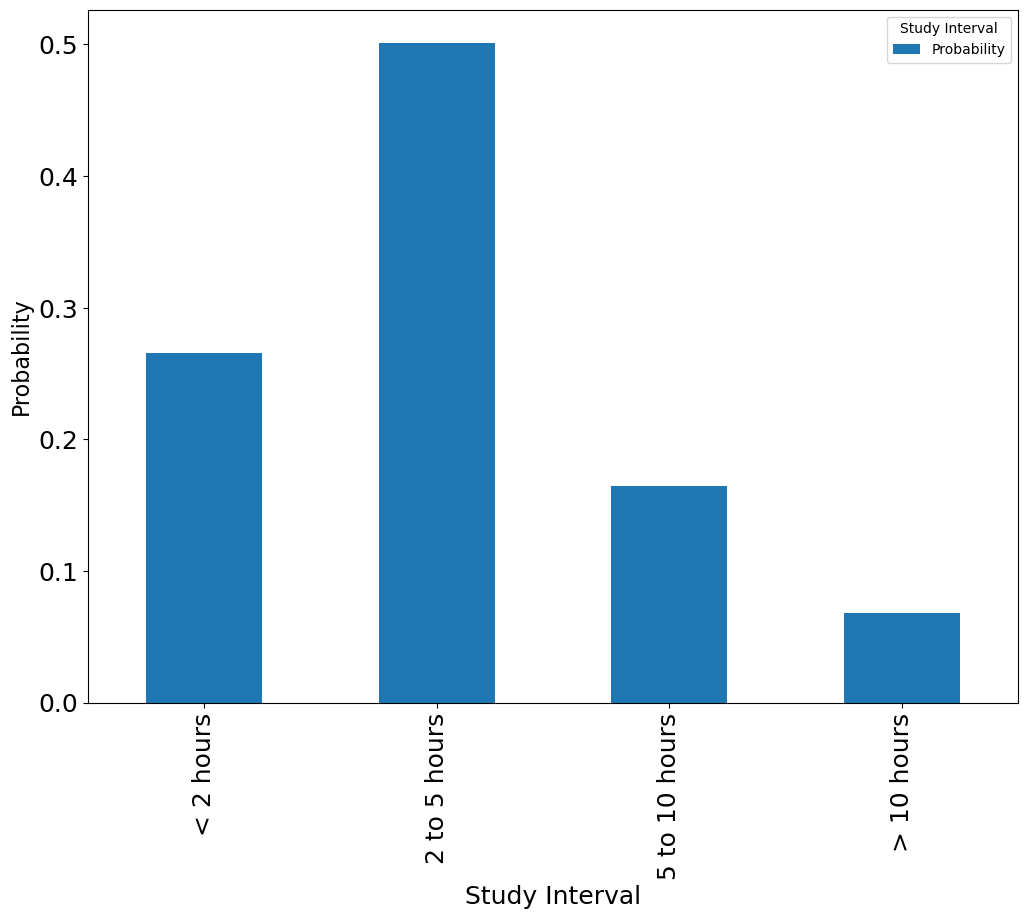

In [18]:
data_temp = data_mat["studytime"].value_counts() # 计算 "studytime" 列中各个取值的频数
P_studytime = pd.DataFrame((data_temp/data_temp.sum()).sort_index()) # 将频数转换为概率
P_studytime.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"] 
P_studytime.columns = ["Probability"]
P_studytime.columns.name = "Study Interval"

P_studytime.plot.bar(figsize=(12,9),fontsize=18) # 绘制学习时间区间的概率条形图
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Study Interval",fontsize=18)

Score  Probability
Low        0.81519
High       0.18481


Text(0, 0.5, 'Probability')

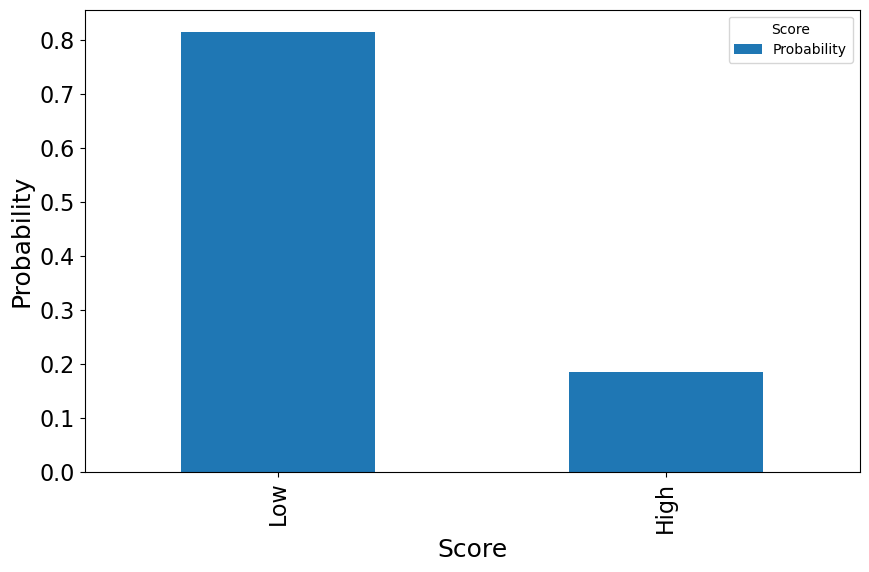

In [19]:
data_temp = (data_mat["G3"]>=15).value_counts() # 计算考试分数大于等于15的学生人数
P_score15_p = pd.DataFrame(data_temp/data_temp.sum()) # 将人数转换为概率
P_score15_p.index = ["Low","High"]
P_score15_p.columns = ["Probability"]
P_score15_p.columns.name = "Score"
print(P_score15_p)
P_score15_p.plot.bar(figsize=(10,6),fontsize=16) # 绘制考试分数的概率条形图
plt.xlabel("Score",fontsize=18)
plt.ylabel("Probability",fontsize=18)

Probability of study interval given that the student gets a highscore:


Text(0, 0.5, 'Probability')

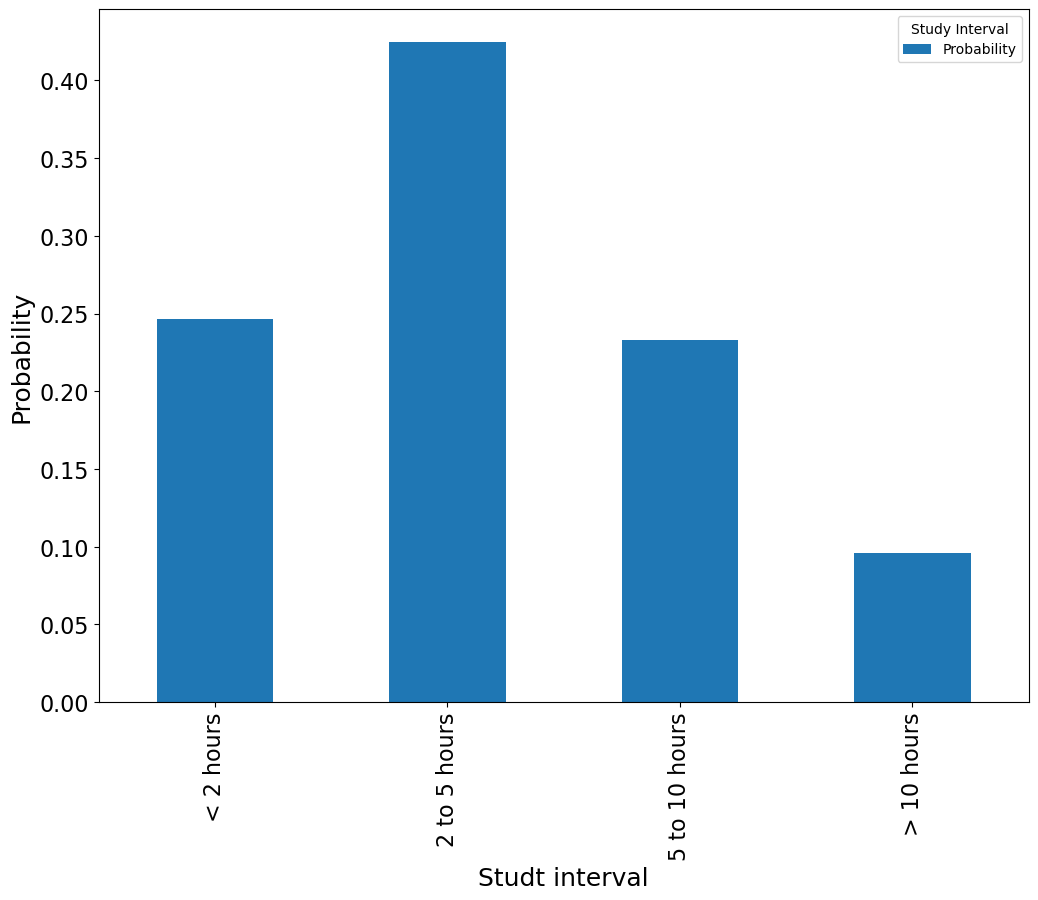

In [20]:
score = 15
data_temp = data_mat.loc[data_mat["G3"]>=score,"studytime"]
P_T_given_score15= pd.DataFrame((data_temp.value_counts()/data_temp.shape[0]).sort_index())
P_T_given_score15.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_T_given_score15.columns = ["Probability"]
print("Probability of study interval given that the student gets a highscore:")
P_T_given_score15.columns.name="Study Interval"
P_T_given_score15.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Studt interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)

Probability of high score given study interval :


Text(0, 0.5, 'Probability')

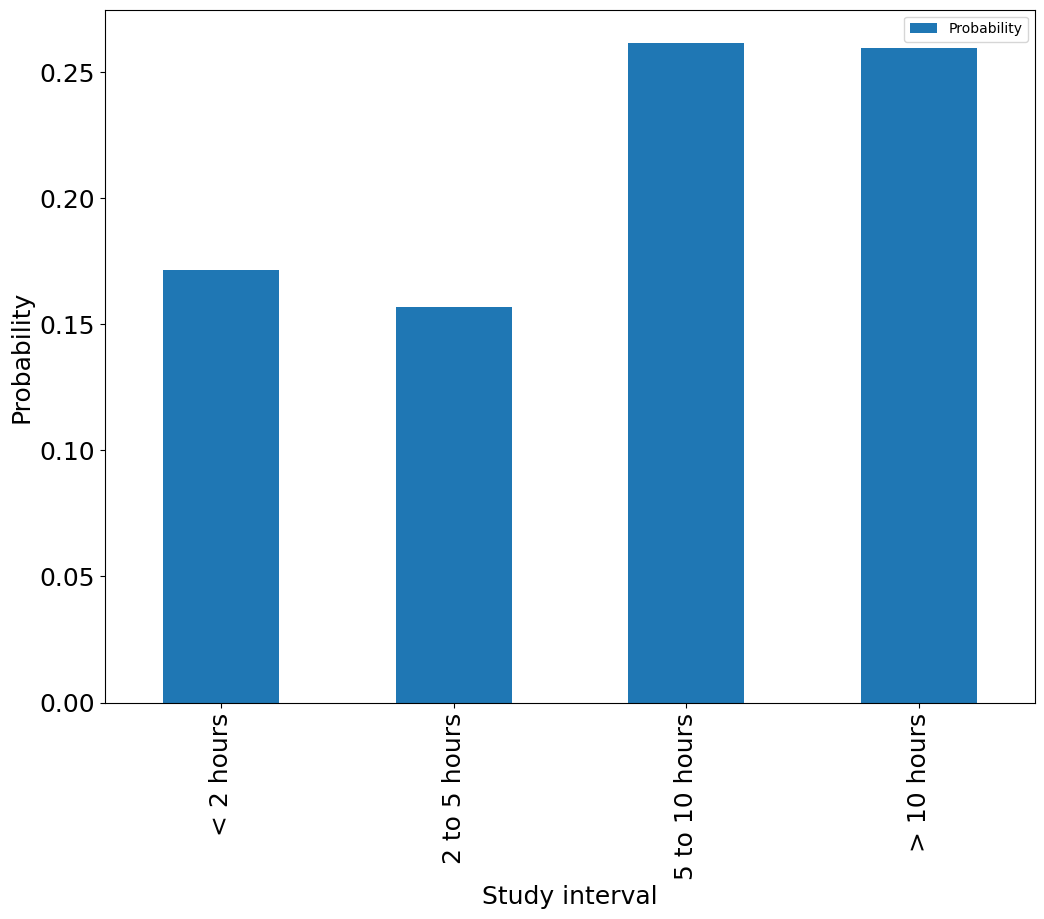

In [21]:
P_score15_given_T_p = P_T_given_score15 * P_score15_p.loc["High"] / P_studytime
print("Probability of high score given study interval :")
pd.DataFrame(P_score15_given_T_p).plot.bar(figsize=(12,9),fontsize=18).legend(loc="best")
plt.xlabel("Study interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)